Testing dataset quality Bag-of-Words with Multinomial Naive Bayes

In [28]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import random

In [29]:
data = pd.read_csv('sampled_2k.csv')

# Printing dataset
data.head()

,Sentence,Sentiment
0,Has it? I don't know many unhappy TSLA invest...,positive
1,"I dont know what type of acct a ""brokerage acc...",positive
2,Not stupid in the slightest. I'm sure there ar...,positive
3,All TSLA call holders are so elated about the ...,positive
4,"YOLO TSLA calls, something like 9/10 785c, pro...",positive


In [30]:
print(data.shape)
print(data.Sentiment.value_counts())

(4000, 2)
positive    2000
negative    2000
Name: Sentiment, dtype: int64


In [31]:
data = data[data.Sentiment != "neutral"]
print(data.Sentiment.value_counts())

positive    2000
negative    2000
Name: Sentiment, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.20, random_state = 42)

In [33]:
## Sentiment Distrubtion for Train and Test
from collections import Counter

print("Distribution for training:\n", train.Sentiment.value_counts())
print("Distribution for testing:\n", test.Sentiment.value_counts())

Distribution for training:
 positive    1600
negative    1600
Name: Sentiment, dtype: int64
Distribution for testing:
 positive    400
negative    400
Name: Sentiment, dtype: int64


In [34]:
x_train = train['Sentence']
x_test = test['Sentence']
y_train = train['Sentiment']
y_test = test['Sentiment']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 1), min_df = 1, token_pattern = r'[a-zA-Z]+')
x_train_bow = tfidf_vec.fit_transform(x_train) # fit train
x_test_bow = tfidf_vec.transform(x_test) # transform test

In [36]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
history = model_mnb.fit(x_train_bow, y_train)

In [37]:
from sklearn.model_selection import cross_val_score

model_gnb_acc = cross_val_score(estimator = model_mnb, X = x_train_bow, y = y_train, cv = 5, n_jobs = -1)

model_gnb_acc

array([0.6890625, 0.6890625, 0.6625   , 0.6921875, 0.69375  ])

Evaluation

In [38]:
# Accuracy
y_pred = model_mnb.predict(x_test_bow)

print(model_mnb.score(x_test_bow, y_test))

0.67875


In [39]:
#F1
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, 
         average=None, 
         labels = data.Sentiment.unique())

array([0.73201251, 0.59906396])

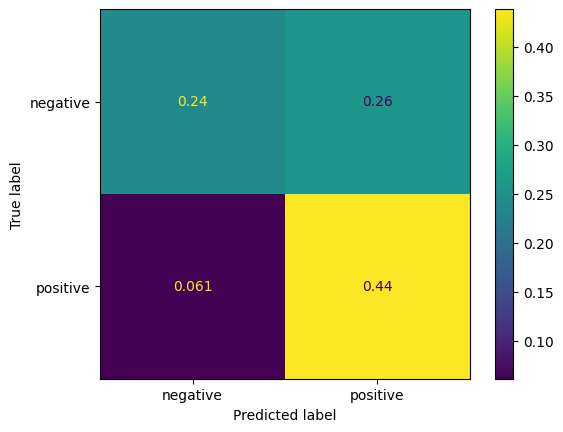

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

bi_labels = ['negative', 'positive']
#mu_labels = ['negatve', 'neutral', 'positive']

cm = confusion_matrix(y_test, y_pred, normalize = 'all') 

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bi_labels)

disp.plot()
plt.show()